## 1. 데이터 불러오기와 기본적 탐색 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [3]:
df = pd.read_csv('./Data/london_merged.csv', parse_dates=['timestamp'])
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [4]:
print('데이터 구조', df.shape) #행과 열의 개수
print('데이터 타입', df.dtypes) #열별로 데이터의 타입이 어떤지 출력
print('데이터의 컬럼', df.columns) #데이터 컬럼 불러오기

데이터 구조 (17414, 10)
데이터 타입 timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code           float64
is_holiday             float64
is_weekend             float64
season                 float64
dtype: object
데이터의 컬럼 Index(['timestamp', 'cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code',
       'is_holiday', 'is_weekend', 'season'],
      dtype='object')


In [5]:
# 결측치 확인 -> 0이 나오면 결측치가 없는 것임
df.isna().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

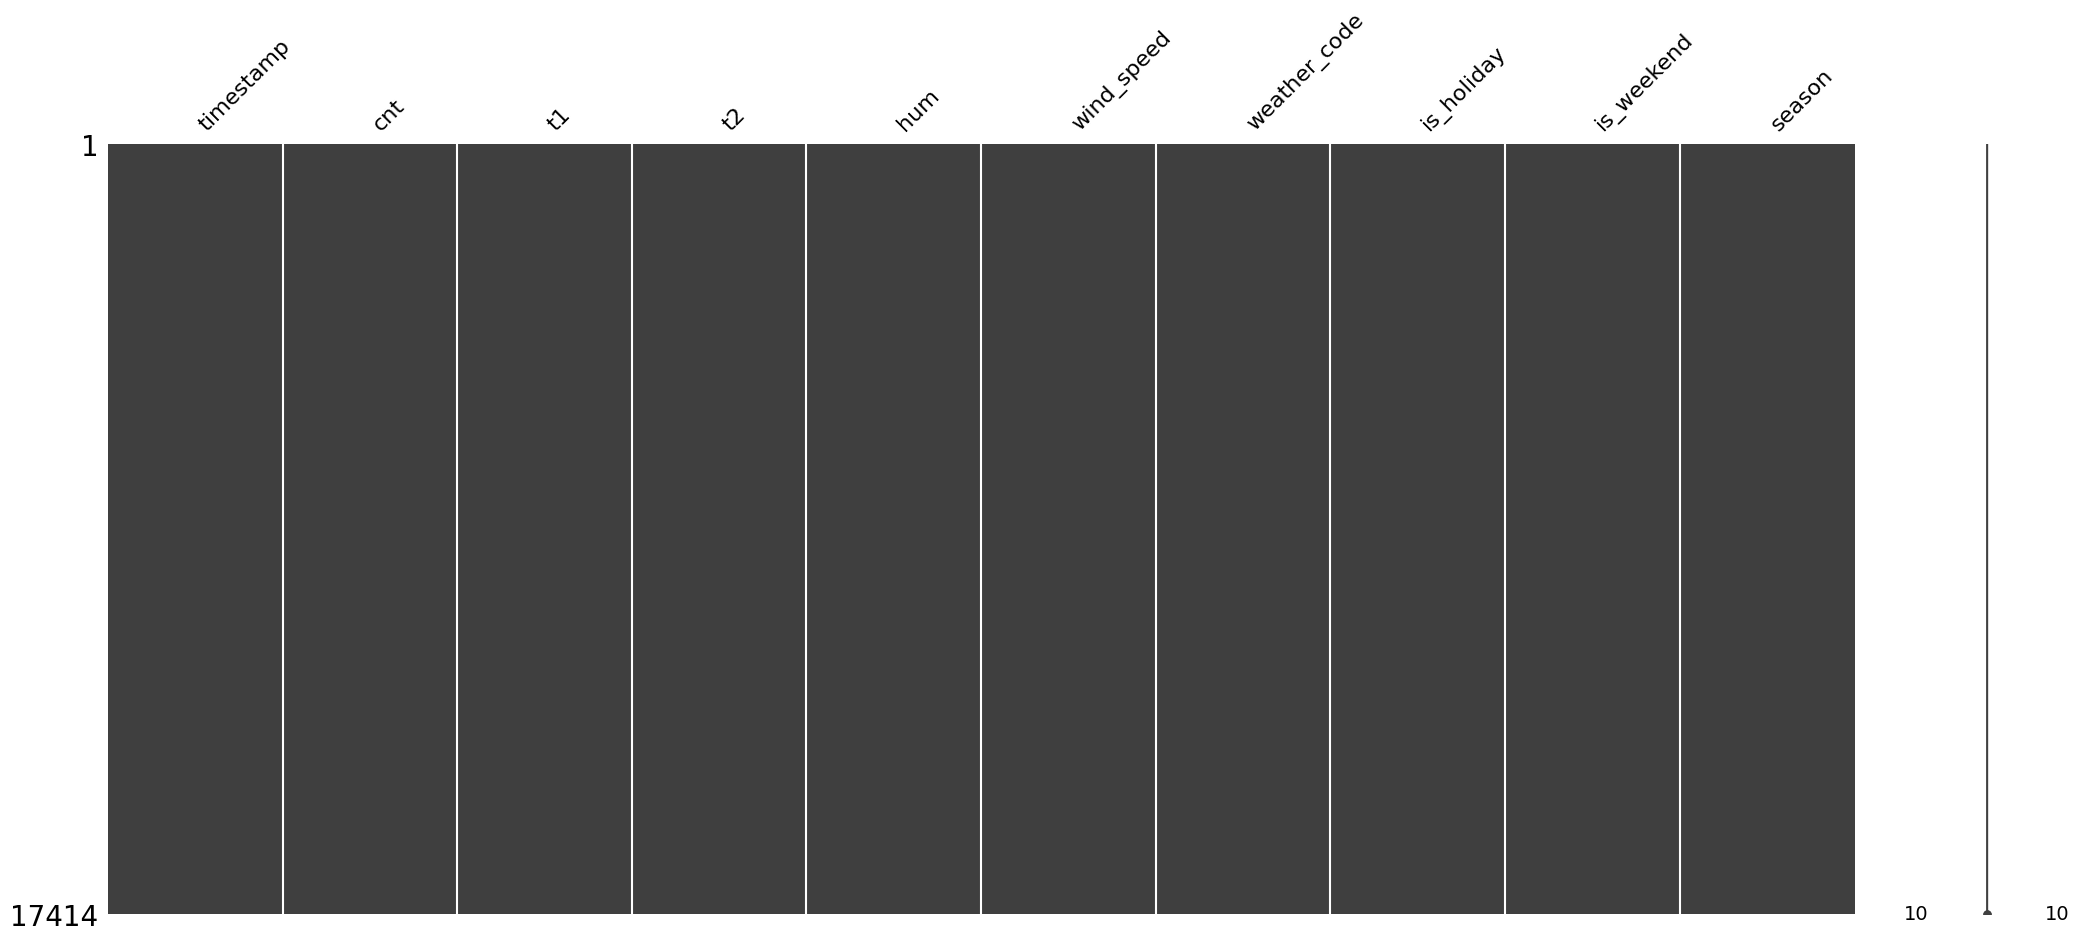

In [6]:
msno.matrix(df)
plt.show()

In [7]:
# timestamp별로 추출해서 추가적인 데이터 생성 진행
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['dayforweek'] = df['timestamp'].dt.dayofweek
df['hour'] = df['timestamp'].dt.hour
df.head

<bound method NDFrame.head of                 timestamp   cnt   t1   t2    hum  wind_speed  weather_code  \
0     2015-01-04 00:00:00   182  3.0  2.0   93.0         6.0           3.0   
1     2015-01-04 01:00:00   138  3.0  2.5   93.0         5.0           1.0   
2     2015-01-04 02:00:00   134  2.5  2.5   96.5         0.0           1.0   
3     2015-01-04 03:00:00    72  2.0  2.0  100.0         0.0           1.0   
4     2015-01-04 04:00:00    47  2.0  0.0   93.0         6.5           1.0   
...                   ...   ...  ...  ...    ...         ...           ...   
17409 2017-01-03 19:00:00  1042  5.0  1.0   81.0        19.0           3.0   
17410 2017-01-03 20:00:00   541  5.0  1.0   81.0        21.0           4.0   
17411 2017-01-03 21:00:00   337  5.5  1.5   78.5        24.0           4.0   
17412 2017-01-03 22:00:00   224  5.5  1.5   76.0        23.0           4.0   
17413 2017-01-03 23:00:00   139  5.0  1.0   76.0        22.0           2.0   

       is_holiday  is_weekend  se

In [8]:
df['year'].value_counts()

year
2016    8699
2015    8643
2017      72
Name: count, dtype: int64

### 데이터 전처리

In [16]:
#아웃라이어 제거 - 시그마 제거, IQR, 군집분석 등 다양한 방법이 있음

def is_outliers(s) :
    lower_limit = s.mean() - (s.std()*3)
    upper_limit = s.mean() + (s.std()*3)
    return ~s.between(lower_limit, upper_limit)

In [17]:
df['is_outlier'] = df.groupby('hour')['cnt'].transform(is_outliers)
df_out = df[~df['is_outlier']]

print('이상치 제거 전 :', df.shape)
print('이상치 제거 후 :', df_out.shape)

이상치 제거 전 : (17414, 15)
이상치 제거 후 : (17265, 15)


In [ ]:
# 카테고리 변수로 바꾸기
df_out['weather_code'] = df_out['weather_code'].astype('category')
df_out['season'] = df_out['season'].astype('category')
df_out['year'] = df_out['year'].astype('category')
df_out['month'] = df_out['month'].astype('category')
df_out['hour'] = df_out['hour'].astype('category')

C:\Users\SDLPC187\AppData\Local\Temp\ipykernel_2448\2399482984.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_out['weather_code'] = df_out['weather_code'].astype('category')
C:\Users\SDLPC187\AppData\Local\Temp\ipykernel_2448\2399482984.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_out['season'] = df_out['season'].astype('category')
C:\Users\SDLPC187\AppData\Local\Temp\ipykernel_2448\2399482984.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

In [19]:
df_out.dtypes

timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code          category
is_holiday             float64
is_weekend             float64
season                category
year                  category
month                 category
dayforweek               int32
hour                  category
is_outlier                bool
dtype: object

In [20]:
# 더미처리 바꾸기

#원래 형태
df_out['season']

0        3.0
1        3.0
2        3.0
3        3.0
4        3.0
        ... 
17409    3.0
17410    3.0
17411    3.0
17412    3.0
17413    3.0
Name: season, Length: 17265, dtype: category
Categories (4, float64): [0.0, 1.0, 2.0, 3.0]

In [22]:
df_out = pd.get_dummies(df_out, columns=['weather_code', 'season', 'year', 'month', 'hour'])
df_out.head()

,timestamp,cnt,t1,t2,hum,wind_speed,is_holiday,is_weekend,dayforweek,is_outlier,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,0.0,1.0,6,False,...,False,False,False,False,False,False,False,False,False,False
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,0.0,1.0,6,False,...,False,False,False,False,False,False,False,False,False,False
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,0.0,1.0,6,False,...,False,False,False,False,False,False,False,False,False,False
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,0.0,1.0,6,False,...,False,False,False,False,False,False,False,False,False,False
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,0.0,1.0,6,False,...,False,False,False,False,False,False,False,False,False,False


In [24]:
df_out.shape

(17265, 60)

In [26]:
# 독립변수와 종속변수 분리하는 작업

df_y = df_out['cnt']
df_x = df_out.drop(['timestamp', 'cnt'], axis=1) # 해당 부분을 열을 기준으로 버림
df_x.head()

,t1,t2,hum,wind_speed,is_holiday,is_weekend,dayforweek,is_outlier,weather_code_1.0,weather_code_2.0,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,3.0,2.0,93.0,6.0,0.0,1.0,6,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,3.0,2.5,93.0,5.0,0.0,1.0,6,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,2.5,2.5,96.5,0.0,0.0,1.0,6,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,2.0,2.0,100.0,0.0,0.0,1.0,6,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,2.0,0.0,93.0,6.5,0.0,1.0,6,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [27]:
# 훈련용, 테스트용 데이터 분리

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_x,df_y,random_state=60, test_size=0.3, shuffle=False)

In [29]:
print('x_train의 구조',x_train.shape)
print('y_train의 구조',y_train.shape)

print('x_test의 구조',x_test.shape)
print('y_test의 구조',y_test.shape)

x_train의 구조 (12085, 58)
y_train의 구조 (12085,)
x_test의 구조 (5180, 58)
y_test의 구조 (5180,)
